In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. Load data
data_amalia = pd.read_csv('hargaberas.csv')

In [15]:
# 2. Deteksi otomatis kolom pasar
harga_cols = [col for col in data_amalia.columns if 'Pasar' in col]

In [6]:
# 3. Bersihkan nilai harga: hapus koma, ubah ke float
for col in harga_cols + ['PIBC']:
    data_amalia[col] = (
        data_amalia[col]
        .astype(str)
        .str.replace('.', '', regex=False)   # Hapus ribuan
        .str.replace(',', '.', regex=False)  # Ubah desimal ke format Python
        .astype(float)
    )

In [16]:
# 4. Hitung harga rata-rata dari seluruh pasar tradisional
data_amalia ['harga_pasar_tradisional'] = data_amalia[harga_cols].mean(axis=1)

In [8]:
# 5. Siapkan data regresi: harga sebagai X, jarak sebagai y
X = data_amalia[['harga_pasar_tradisional']]
X = sm.add_constant(X)  # Tambahkan intercept
y = data_amalia['Jarak dari PIBC']

In [9]:
# 6. Bangun model regresi
model = sm.OLS(y, X).fit()
data_amalia['prediksi_jarak'] = model.predict(X)

In [10]:
# 7. Cetak ringkasan model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Jarak dari PIBC   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     3.277
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.168
Time:                        15:35:48   Log-Likelihood:                -10.239
No. Observations:                   5   AIC:                             24.48
Df Residuals:                       3   BIC:                             23.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


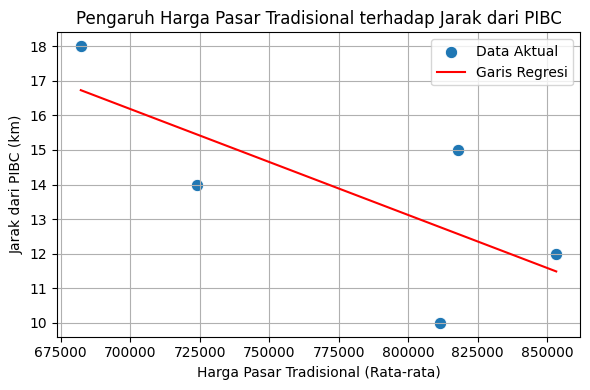

In [12]:
# 8. Visualisasi
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data_amalia['harga_pasar_tradisional'], y=data_amalia['Jarak dari PIBC'], s=80, label='Data Aktual')
sns.lineplot(x=data_amalia['harga_pasar_tradisional'], y=data_amalia['prediksi_jarak'], color='red', label='Garis Regresi')
plt.xlabel('Harga Pasar Tradisional (Rata-rata)')
plt.ylabel('Jarak dari PIBC (km)')
plt.title('Pengaruh Harga Pasar Tradisional terhadap Jarak dari PIBC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()